# Project: Investigate TMDB 5000 Movie Data Set (from Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one *dependent variable* and three *independent variables*.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This project will examine a dataset related to 5000 movies released from 1916 - 2017. The data comes from The Movie Database (TMDB) and was made available on Kaggle at https://www.kaggle.com/tmdb/tmdb-movie-metadata.

The dataset consists of two csv files. The first file 'tmdb_5000_movies.csv' consists of movie titles, release dates, production information, popularity ratings and a  variety of metadata. The second file 'tmdb_5000_credits.csv' includes information about cast and crew for the same set of movies. Both files include an index which presumably can be used as a key to relate the respective data.

Potential research questions are:
- is there a correlation between budget and user ratings.
- what are the percentages of male and female cast members?
- what are percentages of male and female directors over time?
- what are the percentages of male and female crew members over time?
- on an annual basis what are the percentages of movies per genre

Exploratory data analysis tasks:
- Understand the date ranges for this database
- Review the variable definitions

Some background information about fields:
- Popularity is defined here
    - https://www.themoviedb.org/talk/5141d424760ee34da71431b0
    - https://developers.themoviedb.org/3/getting-started/popularity
- vote_average is defined here
    - https://www.themoviedb.org/talk/57c5cbba9251415e00000137


In [225]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline
import calendar
import datetime

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [226]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df1 = pd.read_csv('tmdb_5000_movies.csv')
df2 = pd.read_csv('tmdb_5000_credits.csv')

df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [227]:
# tmdb_5000_movies.csv first 5 rows
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [228]:
# lets look in detail at the columns which contain dictionaries (this and the next several cells)
# df1 genres
df1.loc[0,'genres']
# dictionary of dictionaries, but not too long

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [229]:
# df1 keywords
df1.loc[0,'keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [230]:
# df1 production_companies
df1.loc[0,'production_companies']

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [231]:
# df1 production_countries
df1.loc[0,'production_countries']

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [232]:
# df1 spoken_languages
df1.loc[0,'spoken_languages']

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [233]:
# credits.csv (second csv included in this dataset) first five rows
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [234]:
# in this and the next cell, we look in detail at the cells containing dictionaries in df2 - Cast, Crew
df2.loc[0,'cast']
# df2=df2.set_index('title')
# df2.loc['Her','cast']
# this is a lot of info. Will have to figure out how to clean/parse if I'm gonna do anything useful with this.

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [235]:
# looking at the Crew dictionary within the df2 dataframe
df2.loc[0,'crew']
# this is a lot of info. Same comment applies as above

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [236]:
# Sort by Release Date to see release dates of earliest movies in dataset
df3 = df1.sort_values('release_date')
df3.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4592,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1916-09-04,8394751,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60
4661,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1925-11-05,22000000,151.0,[],Released,NaN,The Big Parade,7.0,21
2638,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657
4457,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,905,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,"[{""name"": ""Nero Films"", ""id"": 4903}]","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1929-01-30,0,109.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45
4594,379000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,65203,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 10229...",en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1929-02-08,4358000,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19


In [237]:
# Sort by Release Date to see release dates of latest movies in dataset
df3 = df1.sort_values('release_date')
df3.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4720,8500000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{""id"": 2831, ""name"": ""slavery""}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,"[{""name"": ""Phantom Four"", ""id"": 423}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-09-09,15861566,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178
3302,8000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,374461,"[{""id"": 1650, ""name"": ""cook""}, {""id"": 6054, ""n...",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"[{""name"": ""Envision Media Arts"", ""id"": 19456},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-09-16,0,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129
3408,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,325373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 46...",en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,[],[],2016-10-02,0,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Two Lovers and a Bear,6.8,27
4255,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],[],2017-02-03,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [243]:
# Here we are counting movies in the TMDB database by release year and displaying the count
df3['release_year'] = df3['release_date'].str[:4] # strip everything except the year from the 'release_date' columng
df4 = df3['release_year'].value_counts().reset_index() #count the number of movies released per year
df4.columns = ['release_year', 'count'] #create new dataframe with release_year and the count of movies released
df4 = df4.sort_values(by = 'release_year', ascending=1)#sort the new dataframe by release year
# df4.sort_values(by = 'count', ascending=0)
# df4.head()
with pd.option_context('display.max_rows', None, 'display.max_columns', 3): # allows Jupyter Notebook to display entire df
    print (df4.to_string(index=False)) # suppresses the index in the printout

release_year  count
       1916      1
       1925      1
       1927      1
       1929      2
       1930      1
       1932      1
       1933      2
       1934      1
       1935      1
       1936      2
       1937      2
       1938      2
       1939      3
       1940      5
       1941      1
       1942      2
       1944      2
       1945      4
       1946      3
       1947      3
       1948      3
       1949      2
       1950      1
       1951      3
       1952      4
       1953      4
       1954      4
       1955      2
       1956      3
       1957      2
       1958      1
       1959      3
       1960      3
       1961      5
       1962      7
       1963      8
       1964     10
       1965      8
       1966      6
       1967      4
       1968     10
       1969     10
       1970     12
       1971     10
       1972      9
       1973      9
       1974      8
       1975      6
       1976      9
       1977     16
       1978     14
       1979

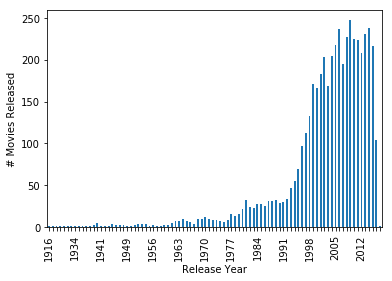

In [242]:
# plots the data in df4 as a histogram
"""plt.hist(release_year, bins = 'auto')
plt.title('Distribution of Movie Release Years (TMDB Dataset)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.axis([0, 60, 0, 3000])
plt.show()"""
# df4.plot.hist('release_year') 
ax = df4.plot(x='release_year', y='count', kind='bar',legend=False)
# ax.set_xlim((1916, 2017))
ax.set_xlabel("Release Year")
ax.set_ylabel("# Movies Released")
n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
"""for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
# plt.hist(df4['count', bins = 'release_year'])"""
# plt.tight_layout()
plt.show()


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

It appears that the data in these two files are rather clean. Both files contain the same number of lines (4803) and both contain a movie 'index' which appears to match for the same movie in each file.  Only a minority of movie listings have a web homepage (1712/4803) and far from all (3959/4803) have a "tagline." However, neither of these fields are critical for any of the research questions under consideration.

- We will run some tests to make sure that the "id" field in 'tmdb_5000_movies.csv' and "movie_id" in 'tmdb_5000_credits.csv' represent the same movie.

- We will also check to make sure that we can run queries that help to answer all of the research questions using joins in pandas or if it will be necessary to actually merge the two files.

- It may make sense to create a condensed data file: if so, we will create helper functions and a condensed datafile which will allow us to perform analysis and create visualizations.



In [67]:
# First step is to run some tests of movies from various time periods to make sure the "id" and "movie_id"
#   fields in each file are indexing the same movie.
df1.loc[df1['id'] == 935]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4173,1800000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,935,"[{""id"": 840, ""name"": ""usa president""}, {""id"": ...",en,Dr. Strangelove or: How I Learned to Stop Worr...,Insane General Jack D. Ripper initiates a nucl...,41.996783,"[{""name"": ""Hawk Films"", ""id"": 88}, {""name"": ""C...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1964-01-29,9440272,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot-line suspense comedy,Dr. Strangelove or: How I Learned to Stop Worr...,8.0,1442


In [68]:
df2.loc[df2['movie_id'] == 935]

,movie_id,title,cast,crew
4173,935,Dr. Strangelove or: How I Learned to Stop Worr...,"[{""cast_id"": 13, ""character"": ""Group Capt. Lio...","[{""credit_id"": ""52fe4290c3a36847f802879d"", ""de..."


In [29]:
df1.loc[df1['id'] == 238]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893


In [32]:
df2.loc[df2['movie_id'] == 238]

,movie_id,title,cast,crew
3337,238,The Godfather,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de..."


In [34]:
df1.loc[df1['id'] == 9806]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
339,92000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/disneyvideos/animatedfilm...,9806,"[{""id"": 1308, ""name"": ""secret identity""}, {""id...",en,The Incredibles,Bob Parr has given up his superhero days to lo...,77.817571,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-11-05,631442092,115.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,"No gut, no glory",The Incredibles,7.4,5152


In [35]:
df2.loc[df2['movie_id'] == 9806]

,movie_id,title,cast,crew
339,9806,The Incredibles,"[{""cast_id"": 1, ""character"": ""Bob Parr / Mr. I...","[{""credit_id"": ""52fe4531c3a36847f80c159d"", ""de..."


In [64]:
df1.loc[df1['id'] == 8587]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
494,45000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://movies.disney.com/the-lion-king,8587,"[{""id"": 2143, ""name"": ""loss of parents""}, {""id...",en,The Lion King,A young lion cub named Simba can't wait to be ...,90.457886,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-06-23,788241776,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Life's greatest adventure is finding your plac...,The Lion King,8.0,5376


In [65]:
df2.loc[df2['movie_id'] == 8587]

,movie_id,title,cast,crew
494,8587,The Lion King,"[{""cast_id"": 8, ""character"": ""Young Simba (voi...","[{""credit_id"": ""59161a6bc3a36842690252b9"", ""de..."


In [70]:
df1.loc[df1['id'] == 259943]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3892,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,259943,"[{""id"": 2692, ""name"": ""arranged marriage""}, {""...",zh,归来,Lu and Feng are a devoted couple forced to sep...,6.017273,"[{""name"": ""LeVision Pictures"", ""id"": 20966}]","[{""iso_3166_1"": ""CN"", ""name"": ""China""}]",2014-05-16,0,111.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,Coming Home,6.9,49


In [71]:
df2.loc[df2['movie_id'] == 259943]

,movie_id,title,cast,crew
3892,259943,Coming Home,"[{""cast_id"": 0, ""character"": ""Feng Wanyu"", ""cr...","[{""credit_id"": ""5329c7e0c3a3683f86000001"", ""de..."


In [73]:
df1.loc[df1['id'] == 703]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3739,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,703,"[{""id"": 2398, ""name"": ""narration""}, {""id"": 283...",en,Annie Hall,"In the city of New York, comedian Alvy Singer ...",35.892034,"[{""name"": ""United Artists"", ""id"": 60}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-04-19,38251425,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,A nervous romance.,Annie Hall,7.8,1010


In [74]:
df2.loc[df2['movie_id'] == 703]

,movie_id,title,cast,crew
3739,703,Annie Hall,"[{""cast_id"": 21, ""character"": ""Alvy Singer"", ""...","[{""credit_id"": ""52fe426dc3a36847f801dbbd"", ""de..."


In [75]:
# This was the cell that I was using to look up the movie_id index for various movies
# df2[df2.values == 'Godfather']
df2[df2['title'].str.contains("Coming Home")]

,movie_id,title,cast,crew
3892,259943,Coming Home,"[{""cast_id"": 0, ""character"": ""Feng Wanyu"", ""cr...","[{""credit_id"": ""5329c7e0c3a3683f86000001"", ""de..."


Though not rigorous, this casual comparison of movies from the two files confirms that the id and movie_id are identical for each movie and can be used to relate the two dataframes.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!